# Try With Deep Learning
I havent tried it using simple classifiers and heading straight into deep learning

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import h5py
from keras.models import model_from_json
import os

In [44]:
train_data=pd.read_csv('data1.csv')
validate_data=pd.read_csv('data2.csv')

In [45]:
train_data2=pd.read_csv('data3.csv')
train_x=pd.concat([train_data, train_data2])
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,-0.320710,-0.813104,-1.797856,-2.671061,-3.103414,-2.988188,-2.511264,-1.782173,-0.957324,-0.046539,...,-1.335625,-1.465457,-1.202740,-0.706720,-0.313735,-0.341366,-0.912081,-1.889642,-2.927776,-3.624055
1,0.961586,0.989782,0.835355,0.574514,0.386786,0.447138,0.832640,1.519390,2.371436,3.087012,...,-0.656175,-0.949323,-1.478014,-2.073809,-2.520703,-2.747426,-2.871896,-3.083014,-3.378452,-3.450052
2,0.949166,0.805315,0.293494,-0.344036,-0.910021,-1.272160,-1.433150,-1.559474,-1.808059,-2.157373,...,0.507871,0.489067,0.748604,1.102645,1.308947,1.210047,0.823331,0.280396,-0.199167,-0.320009
3,0.413452,0.046589,-0.298862,-0.571118,-0.839083,-1.210393,-1.674694,-2.039657,-2.092754,-1.834460,...,-0.869120,-0.388985,0.131208,0.473263,0.459038,0.108430,-0.377032,-0.785222,-0.992103,-0.926204
4,0.661680,0.707341,0.453906,0.018676,-0.496279,-1.036679,-1.624540,-2.279095,-2.804397,-2.860567,...,-1.782014,-1.935646,-2.017038,-2.030505,-2.001926,-1.968619,-1.952229,-1.972033,-2.073820,-2.284887


In [46]:
validate_data.shape

(48, 600)

In [47]:
y_train=pd.read_csv('labels.csv', header=None)
y_train=y_train.transpose()
train_y=pd.concat([y_train,y_train])

In [48]:
train_y.shape

(96, 1)

In [49]:
y_validate=y_train
y_validate.shape

(48, 1)

In [50]:
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_train_y = encoder.transform(train_y)
dummy_train_y = np_utils.to_categorical(encoded_train_y)

In [51]:
encoder = LabelEncoder()
encoder.fit(y_validate)
encoded_validate_y = encoder.transform(y_validate)
dummy_validate_y = np_utils.to_categorical(encoded_validate_y)

In [52]:
dummy_train_y.shape

(96, 4)

In [53]:
dummy_validate_y.shape

(48, 4)

In [54]:
model=Sequential()
n_cols = train_data.shape[1]
model.add(Dense(1024,activation='relu',  input_shape=(n_cols,)))
model.add(Dropout(.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(4,activation='softmax'))
opt=Adam(lr=.01)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              615424    
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               131200    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                32832     
__________

In [55]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=3)

checkpoint_filepath = 'weights2.best.my.hdf5'

my_checkpointer = ModelCheckpoint(filepath=checkpoint_filepath,
                               verbose=1, save_best_only=True)
history=model.fit(train_x, dummy_train_y,steps_per_epoch=90,validation_data=(validate_data,dummy_validate_y), epochs = 10000,validation_steps=48,callbacks=[early_stopping_monitor])

Train on 96 samples, validate on 48 samples
Epoch 1/10000
90/90 [==============================] - 2s 22ms/step - loss: 0.4741 - acc: 0.8804 - val_loss: 1.8268 - val_acc: 0.8125
Epoch 2/10000
90/90 [==============================] - 1s 14ms/step - loss: 1.5738 - acc: 0.8238 - val_loss: 3.4938 - val_acc: 0.7708
Epoch 3/10000
90/90 [==============================] - 1s 14ms/step - loss: 6.2898 - acc: 0.5459 - val_loss: 3.6068 - val_acc: 0.7292
Epoch 4/10000
90/90 [==============================] - 1s 15ms/step - loss: 4.1328 - acc: 0.6339 - val_loss: 3.2797 - val_acc: 0.7292


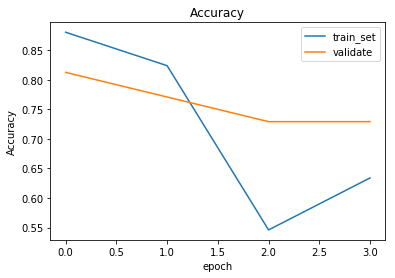

In [60]:
plt.plot(history.history['acc'],label='train_set')
plt.plot(history.history['val_acc'], label='validate')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()

In [57]:
model_json = model.to_json()
with open("bci_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("bci_model.h5")
print("Saved model to disk")

Saved model to disk


# Summary
I got an accuracy of 80% in the first epoch itself after that the model just started to oferfit the data. The reason is maybe due to less data. I haven't tried using normal classifiers but as a deep learning algorithm this is really good as only in one epoch we get such a good result. But having said that my personal intake on the observation is-
1. The data might be noisy I haven't done exploratory analysis of the data as to see if there are outliers. In case of the eye movement experiment with Mr. Abdul we found that the outliers played a really important role.
2. Maybe if get more data we can be sure that the model behaves like this regardless the number of training samples.
3. I haven't tried to normalise the data. I have taken all the data assuming each feature has the same unit.